In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [108]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
Zero_not_accepted=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in Zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=dataset[column].mean(skipna=True)
    dataset[column]=dataset[column].replace(np.NaN,mean)

In [87]:
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [88]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [93]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pre=classifier.predict(X_test)
y_pre

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [94]:
cm=confusion_matrix(y_test,y_pre)
cm

array([[94, 13],
       [16, 31]], dtype=int64)

In [95]:
print(f1_score(y_test,y_pre))
print(accuracy_score(y_test,y_pre))

0.6813186813186813
0.8116883116883117


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


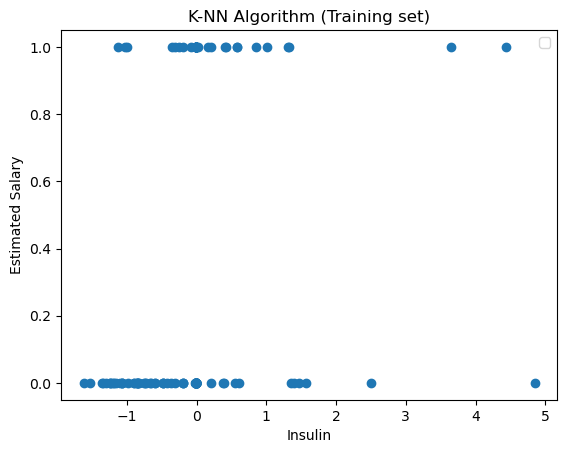

In [109]:
#Visulaizing the trianing set result  
X1=np.asanyarray(X)
mtp.scatter(X_test[:,4],y_pre)
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Insulin')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  
